In [ ]:
"""
Diego Armando Sarmiento Ahumada
301379640
Unsupervised Learning - Section 001
"""

## Excercise 2

In [9]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

1. Generate Swiss roll dataset.

In [10]:
# Load the dataset
X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=40)

y_discrete = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')\
                .fit_transform(y.reshape(-1, 1)).astype(int).ravel()

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


2. Plot the resulting generated Swiss roll dataset.

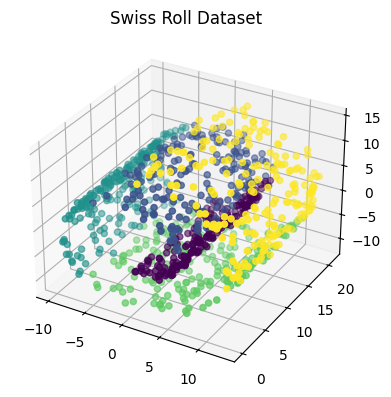

In [11]:
# Plot the dataset
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_discrete, cmap='viridis')
plt.title('Swiss Roll Dataset')
plt.show()

3. Use Kernel PCA (kPCA) with linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points).

In [12]:
# Kernel PCA with linear kernel
linear_pca = KernelPCA(n_components=2, kernel='linear')
X_linear_pca = linear_pca.fit_transform(X)

rbf_pca = KernelPCA(n_components=2, kernel='rbf')
X_rbf_pca = rbf_pca.fit_transform(X)

sigmoid_pca = KernelPCA(n_components=2, kernel='sigmoid')
X_sigmoid_pca = sigmoid_pca.fit_transform(X)

4. Plot the kPCA results of applying the linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points) from (3).

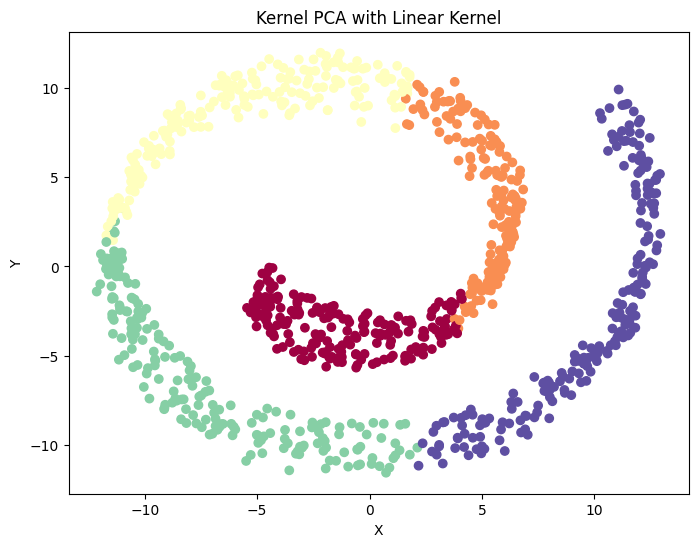

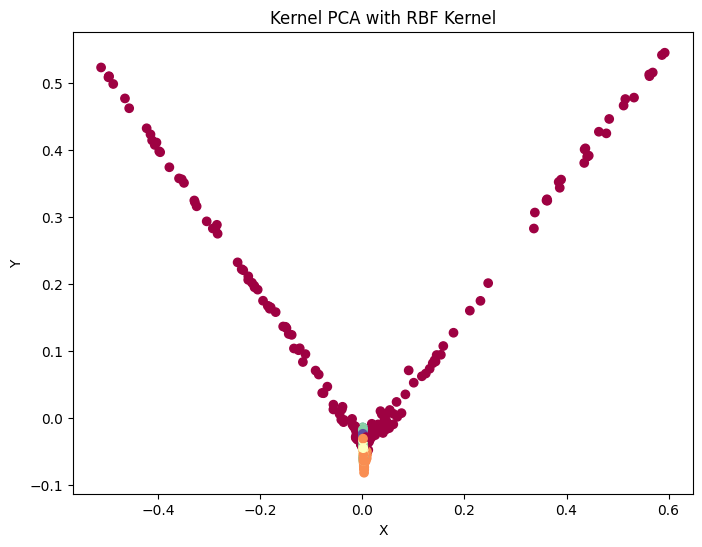

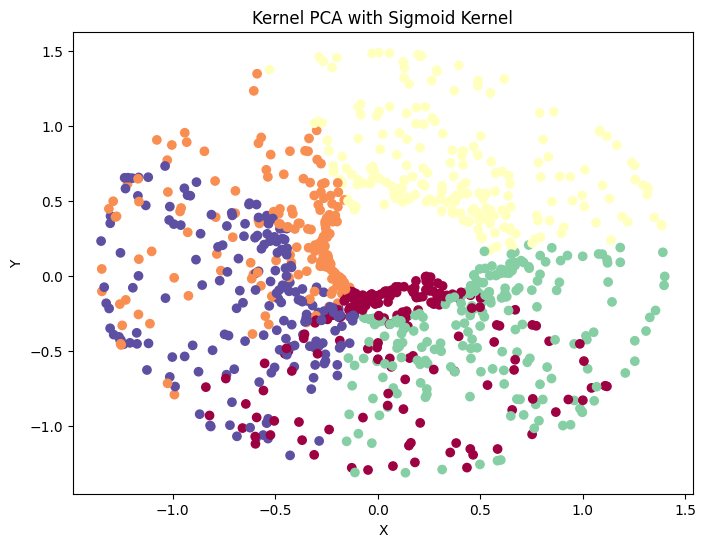

In [13]:
# Plot Kernel PCA

plt.figure(figsize=(8, 6))
plt.scatter(X_linear_pca[:, 0], X_linear_pca[:, 1], c=y_discrete, cmap=plt.get_cmap('Spectral'))
plt.title('Kernel PCA with Linear Kernel')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_rbf_pca[:, 0], X_rbf_pca[:, 1], c=y_discrete, cmap=plt.get_cmap('Spectral'))
plt.title('Kernel PCA with RBF Kernel')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_sigmoid_pca[:, 0], X_sigmoid_pca[:, 1], c=y_discrete, cmap=plt.get_cmap('Spectral'))
plt.title('Kernel PCA with Sigmoid Kernel')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.

In [14]:
# Grid search to find the best parameters for Kernel PCA

pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = {
    'kpca__kernel': ['linear', 'rbf', 'sigmoid'],
    'kpca__gamma': np.logspace(-2, 2, 5)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X, y_discrete)

print("Best parameters:")
print(grid_search.best_params_)

Best parameters:
{'kpca__gamma': 0.01, 'kpca__kernel': 'linear'}


6. Plot the results from using GridSearchCV in (5).

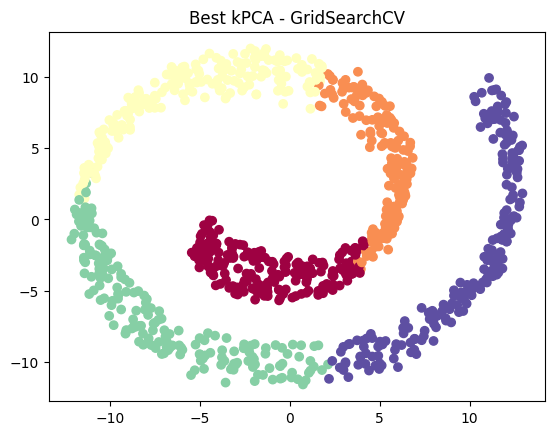

In [15]:
# Plot the best Kernel PCA

best_kpca = grid_search.best_estimator_.named_steps['kpca']
X_best_kpca = best_kpca.transform(X)

plt.scatter(X_best_kpca[:, 0], X_best_kpca[:, 1], c=y_discrete, cmap=plt.cm.Spectral)
plt.title("Best kPCA - GridSearchCV")
plt.show()